We will be fitting an RNN model to perform sentiment analysis on the IMDB movie review dataset. It consists of movie reviews from the IMDb website, where each review is labeled as either positive (1) or negative (0) based on the sentiment expressed in the review. The dataset is preprocessed and tokenized, representing each review as a sequence of integers. Each integer corresponds to a specific word in a dictionary, and the value represents the frequency of the word in the dataset.

The goal of the RNN model with the IMDb movie review dataset is to perform sentiment analysis, specifically classifying movie reviews as either positive or negative based on the text content. By learning patterns and relationships in the sequences of words, the RNN model aims to understand the sentiment expressed in the reviews and make accurate predictions.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


2023-06-25 10:39:05.255311: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-25 10:39:05.301495: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 10:39:05.528827: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 10:39:05.530095: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 10:39:07.127984: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Length of the sequences to pad (truncated or padded)

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)


The IMDb movie review dataset is loaded using the imdb.load_data() function from Keras. The dataset is split into training and testing sets, with reviews represented as sequences of integers.

To handle varying review lengths, the sequences are padded or truncated to a fixed length using the pad_sequences() function. This ensures that all sequences have the same length, a requirement for training the RNN model.

In [3]:
model = Sequential()
model.add(Embedding(max_features, 32))  # Embedding layer for word embeddings
model.add(SimpleRNN(32))  # RNN layer with 32 units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


The RNN model is defined using the Keras Sequential API. An embedding layer is added as the input layer, which learns the dense word embeddings for the input sequences. This is followed by a recurrent layer, specifically the simple RNN layer. Finally, a dense layer with a sigmoid activation function is added for binary classification.

In [4]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 24s 146ms/step - loss: 0.6839 - accuracy: 0.5541 - val_loss: 0.6685 - val_accuracy: 0.5812
Epoch 2/10
157/157 [==============================] - 22s 141ms/step - loss: 0.5786 - accuracy: 0.7117 - val_loss: 0.4612 - val_accuracy: 0.8016
Epoch 3/10
157/157 [==============================] - 22s 140ms/step - loss: 0.3636 - accuracy: 0.8501 - val_loss: 0.5429 - val_accuracy: 0.7288
Epoch 4/10
157/157 [==============================] - 22s 141ms/step - loss: 0.2484 - accuracy: 0.9050 - val_loss: 0.3928 - val_accuracy: 0.8390
Epoch 5/10
157/157 [==============================] - 22s 140ms/step - loss: 0.1622 - accuracy: 0.9427 - val_loss: 0.5471 - val_accuracy: 0.7606
Epoch 6/10
157/157 [==============================] - 22s 140ms/step - loss: 0.1017 - accuracy: 0.9675 - val_loss: 0.5685 - val_accuracy: 0.7844
Epoch 7/10
157/157 [==============================] - 22s 140ms/step - loss: 0.0726 - accuracy: 0.9764 - val_loss: 0.5992 - val_ac

The model is compiled by specifying the loss function, optimizer, and evaluation metric. In this case, binary cross-entropy is used as the loss function and accuracy is used as the evaluation metric.

In [5]:
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


782/782 - 21s - loss: 0.7259 - accuracy: 0.8102 - 21s/epoch - 27ms/step
Test accuracy: 0.8101599812507629


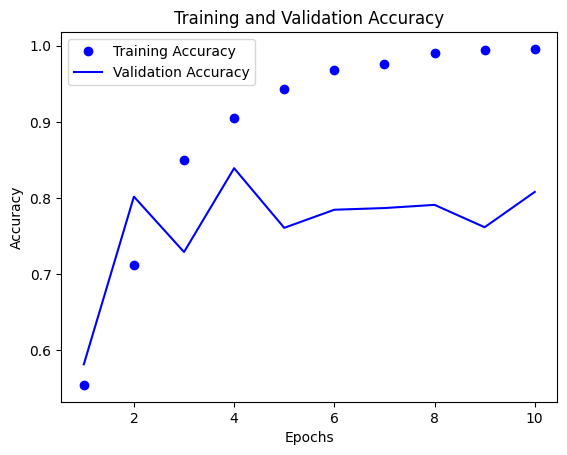

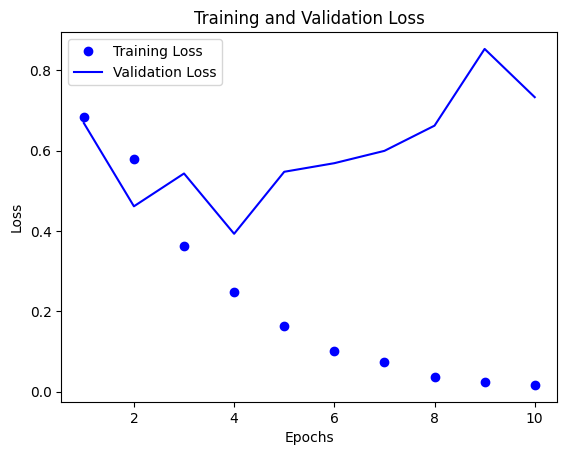

In [6]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
